In [23]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv")
  
  
fetch_data()

!ls dados

Salary_Data.csv


In [24]:
import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

salary_data = load_data()

salary_data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [0]:
#Import Libs
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
#Embaralhar os dados recebidos
salary_data = shuffle(salary_data)

X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

x_train = X[:5,:]
x_test = X[-25:,:]

y_train = Y[:5]
y_test = Y[-25:]

In [0]:
#Criar objeto para realizar regressão liner
regr = linear_model.LinearRegression()

In [28]:
#Realiza a regressão linear
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
#Faz uma previsão de alguns pontos a partir da regressão linear realizada
y_pred = regr.predict(x_test)

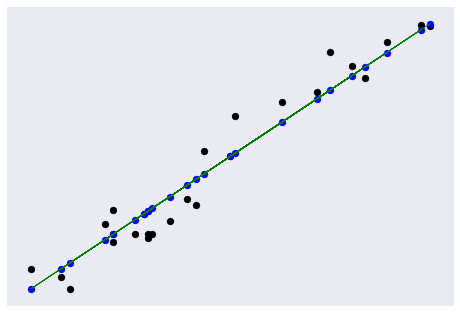

In [30]:
#Criando um plot entre os dados reais (pretos) e os dados previstos(azul)
#Em verde temos a reta resultante da regressão linear

plt.scatter(x_test, y_test,  color='black')
plt.scatter(x_test, y_pred, color='blue')
plt.plot(x_test, y_pred, color='green', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In [31]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [8986.90255391]
Mean squared error: 38244298.48
Variance score: 0.94
